<a href="https://colab.research.google.com/github/Yenaaa/24spring_hss510/blob/main/SupervisedOne_Mar27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HSS 510 Guided Coding: Text Classificaiton with Supervised Learning**

### **2024 Mar 26, Taegyoon Kim**


---



### **Logistic Regression with Count Vector**

* The following demonstrates a typical workflow for binary text classification using logistic regression

* It will walk though 1) a simple train-test split approach 2) a train-validation-split appoach to compare different regularization methods, and 3) cross-validation

### **Load packages**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

### **IMDB Reviews Data**

- We wil use a random sample of 10,000 IMDB commments (from Kaggle: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/suggestions?status=pending&yourSuggestions=true)
- For the sake of time, we will generate an even smaller sample of 1,000 comments

In [ ]:
### Load and examine dataset

file_path = 'https://raw.githubusercontent.com/taegyoon-kim/nlp_dhcss_24spring/main/week_04/imdb_rs_10k.csv'
df_review_10k = pd.read_csv(file_path)

df_review = df_review_10k.sample(frac = 0.2).reset_index(drop = True) # random sample of 2k comments
df_review['sentiment'] = np.where(df_review['sentiment'] == 'positive', 1, 0) # recode outcome variable

print(len(df_review))

2000


In [ ]:
### Overview

class_balance = df_review['sentiment'].value_counts(normalize = True) # class balance
print(class_balance)

df_review.head()

1    0.5195
0    0.4805
Name: sentiment, dtype: float64


,review,sentiment
0,"...Or better yet, watch Fandango if you want t...",0
1,"When I first heard about the show, I heard a l...",1
2,While some performances were good-Victoria Row...,0
3,"Latter Days is a very, VERY independent movie....",1
4,While not quite as good as A Murder is Announc...,1


In [ ]:
### For simplicity, we generate separate short-name objects for the comment and the sentiment label

X = df_review['review']
y = df_review['sentiment']

### **Train/Test split with no regularization**

In [ ]:
### Split the dataset into training and test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train_val))
print(len(X_test))

### Vectorizing text data

tfidf_vectorizer = TfidfVectorizer() # we are using the default settings
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_val) # generate feature space (i.e., tokens)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Training the model

model = LogisticRegression() # instantiate a logistic regression model
model.fit(X_train_tfidf, y_train_val) # estimate coefficients (bias term + weights)

### Making predictions

predictions = model.predict(X_test_tfidf)
print(f'Accuracy (No Regularization): {accuracy_score(y_test, predictions)}')

1600
400
Accuracy (No Regularization): 0.8075


In [ ]:
### We can streamline the above using "Pipeline"

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression(penalty = 'l2', C = 1))
    ])

### Fit the pipeline to the training data

pipeline.fit(X_train_val, y_train_val) # note the use of the train-val sets

### Predict on the test set and evaluate performance

predictions = pipeline.predict(X_test)
print(f'Accuracy (No Regularization): {accuracy_score(y_test, predictions)}')

Accuracy (No Regularization): 0.8075


### **Training, Validation, and Test Sets with L2 Regularization**

In [ ]:
### Further split the training-validate set into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25) # no random state for multiple runs
print(len(X_train))
print(len(X_val))
print(len(X_test))

regularization_strengths = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for c in regularization_strengths:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', LogisticRegression(penalty = 'l2', C = c))
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_val)
    print(f'Accuracy (L2 Regularization, C = {c}): {accuracy_score(y_val, predictions)}')


1200
400
400
Accuracy (L2 Regularization, C = 0.0001): 0.5525
Accuracy (L2 Regularization, C = 0.001): 0.5525
Accuracy (L2 Regularization, C = 0.01): 0.5525
Accuracy (L2 Regularization, C = 0.1): 0.7875
Accuracy (L2 Regularization, C = 1): 0.825
Accuracy (L2 Regularization, C = 10): 0.8225
Accuracy (L2 Regularization, C = 100): 0.84
Accuracy (L2 Regularization, C = 1000): 0.84
Accuracy (L2 Regularization, C = 10000): 0.8325


## **Cross-Validation with L2 Regularization and a Holdout Test Set**

In [ ]:
### Perform 5-fold cross-validation

for c in regularization_strengths:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', LogisticRegression(penalty = 'l2', C = c, random_state = 42))
    ])
    scores = cross_val_score(pipeline, X_train_val, y_train_val, cv = 5)
    print(f'Average Accuracy (L2 Regularization, C = {c}): {scores.mean()}')

Average Accuracy (L2 Regularization, C = 0.0001): 0.5225000000000001
Average Accuracy (L2 Regularization, C = 0.001): 0.5225000000000001
Average Accuracy (L2 Regularization, C = 0.01): 0.5225000000000001
Average Accuracy (L2 Regularization, C = 0.1): 0.716875
Average Accuracy (L2 Regularization, C = 1): 0.819375
Average Accuracy (L2 Regularization, C = 10): 0.8362499999999999
Average Accuracy (L2 Regularization, C = 100): 0.838125
Average Accuracy (L2 Regularization, C = 1000): 0.836875
Average Accuracy (L2 Regularization, C = 10000): 0.8337499999999999


In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression(penalty = 'l2', C = 5))
    ])

### Fit the pipeline to the training data

pipeline.fit(X_train_val, y_train_val) # note the use of the train-val sets


### Predict on the test set and evaluate performance

predictions = pipeline.predict(X_test)
print(f'Accuracy (best configuration based on CV): {accuracy_score(y_test, predictions)}')

Accuracy (best configuration based on CV): 0.825


## **Various ways to evaluate performance**

In [ ]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[152  45]
 [ 25 178]]


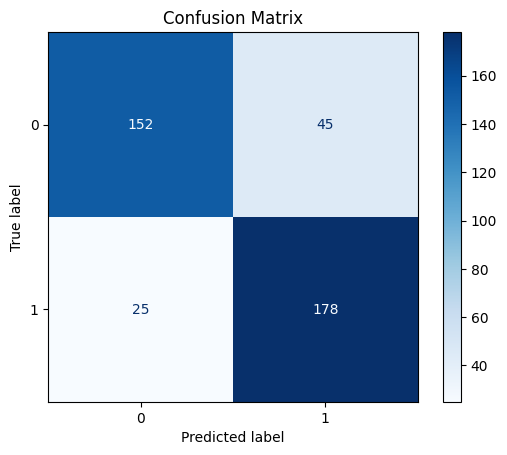

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Use ConfusionMatrixDisplay to plot the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## **Try some hand calculations**

In [ ]:
### hand calculations based on the confusion matrix

accuracy_hand = (400 - (? + ?)) / 400
precision_hand = ? / (? + ?)
recall_hand = ? / (? + ?)
f1_hand = (2 * precision_hand * recall_hand) / (precision_hand + recall_hand)

print(accuracy_hand)
print(precision_hand)
print(recall_hand)
print(f1_hand)

### cross-check

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(accuracy)
print(precision)
print(recall)
print(f1)